# Boston housing

## Sobre el dataset

Los datos se extrajeron del Área Estadística Metropolitana Estándar de Boston (SMSA) en 1970. Los atributos se definen de la siguiente manera

+ CRIM - tasa de criminalidad per cápita por ciudad
+ ZN - proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
+ INDUS - proporción de acres comerciales no minoristas por ciudad.
+ CHAS: variable ficticia del río Charles (1 si el tramo limita con el río; 0 en caso contrario)
+ NOX - concentración de óxidos nítricos (partes por 10 millones)
+ RM - número promedio de cuartos por vivienda
+ EDAD - proporción de unidades ocupadas por propietarios construidas antes de 1940
+ DIS: distancias ponderadas a cinco centros de empleo de Boston
+ RAD - índice de accesibilidad a las carreteras radiales
+ TAX: tasa de impuestos sobre la propiedad de valor total por cada $10,000
+ PTRATIO - ratio alumno-profesor por localidad
+ B: 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
+ LSTAT: % estado más bajo de la población
+ MEDV: valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

In [267]:
# Importamos las librerias que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pandas import read_csv
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

# Le damos formato al dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

# Visualizacion de datos

In [268]:
# Muestra las primeras filas del dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


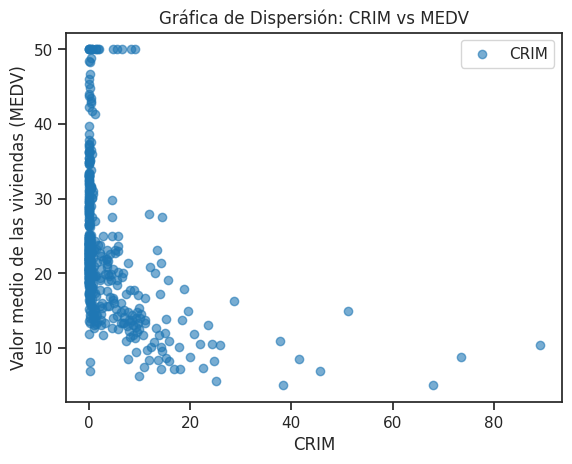

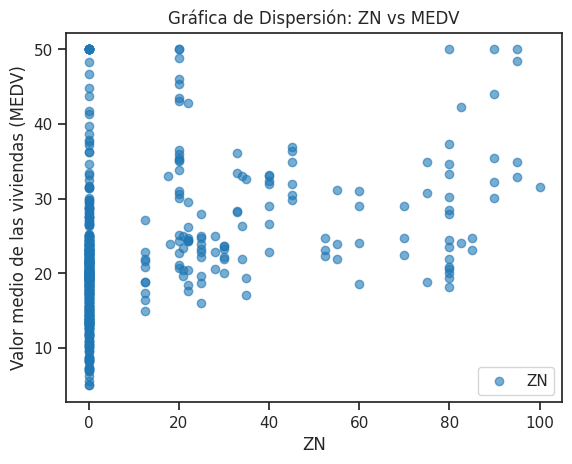

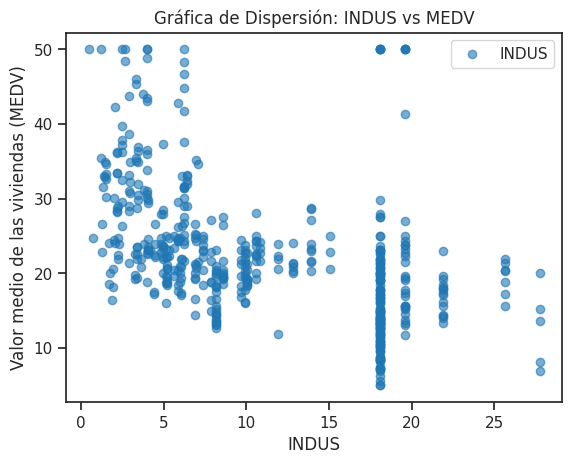

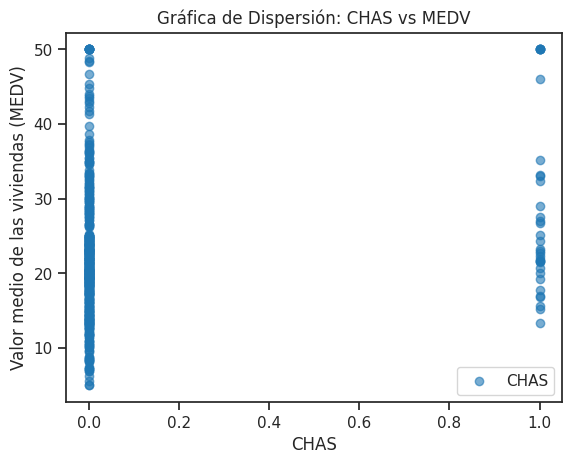

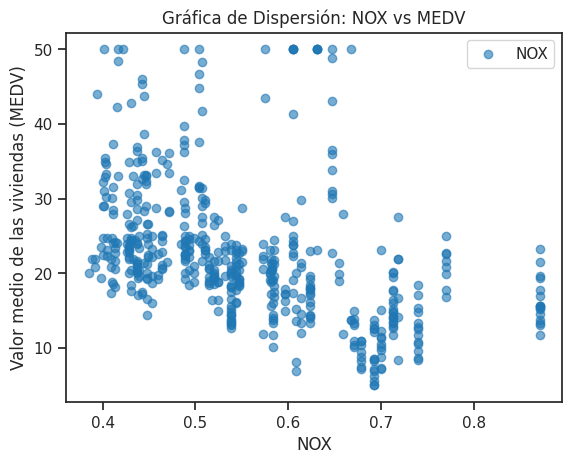

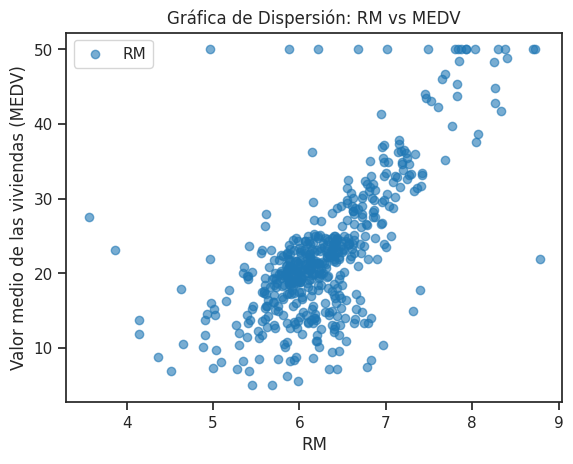

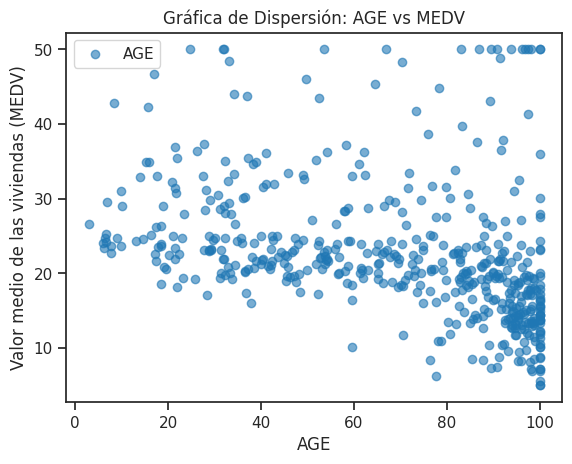

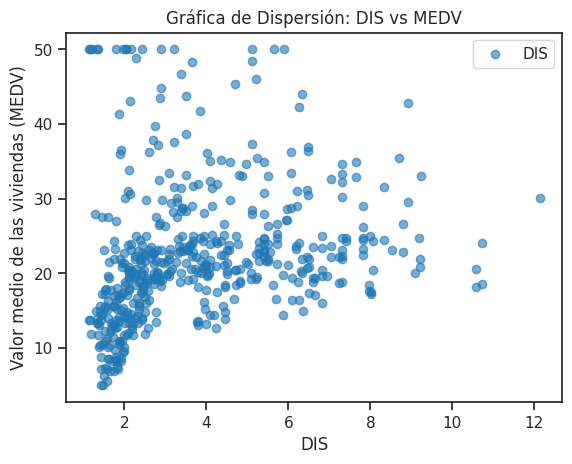

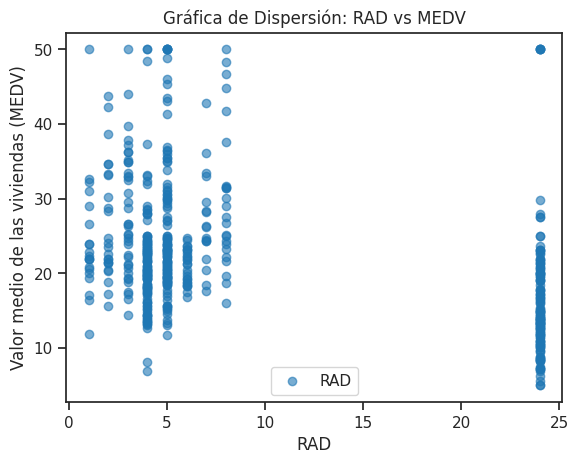

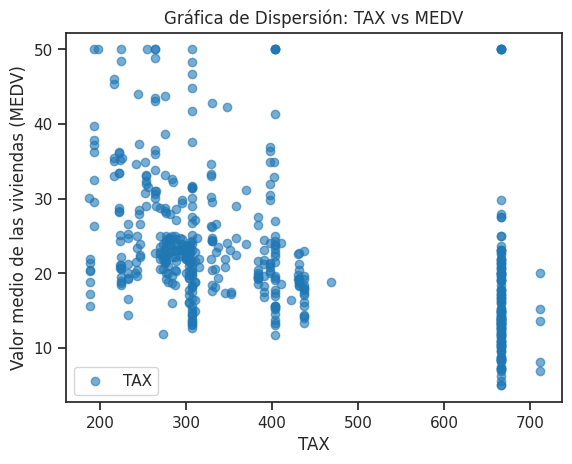

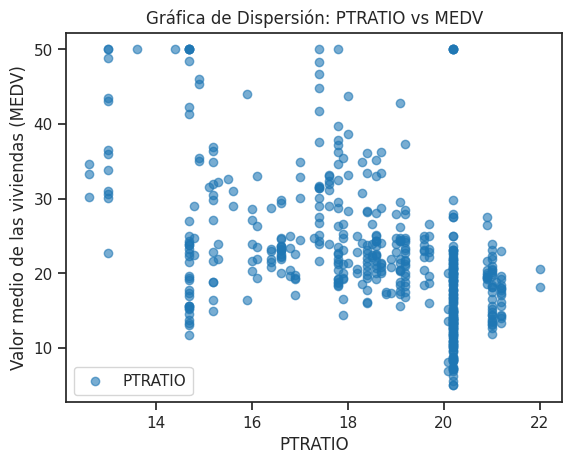

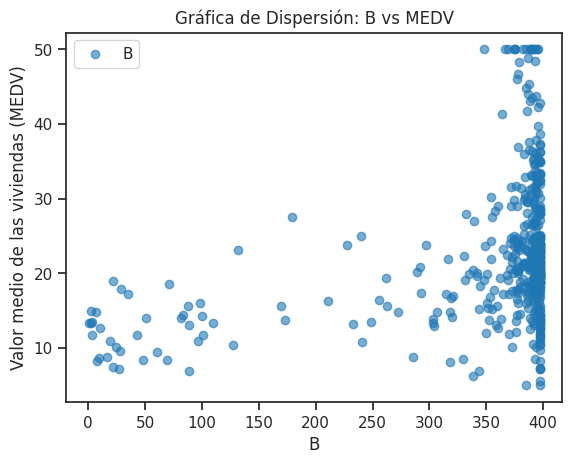

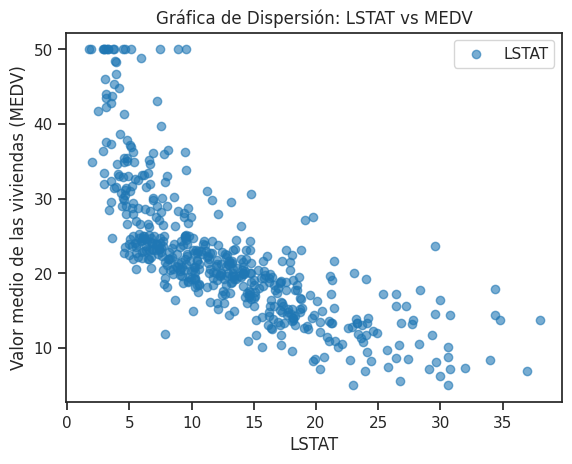

In [269]:
# Definir una lista de colores para cada característica
colors = ['tab:blue']

# Crear gráficas de dispersión entre cada característica y la variable objetivo 'MEDV'
for i, feature in enumerate(data.columns[:-1]):  # Excluimos la columna 'MEDV' que es la variable objetivo
    plt.scatter(data[feature], data['MEDV'], label=feature, alpha=0.6, color=colors[0])
    plt.xlabel(feature)
    plt.ylabel('Valor medio de las viviendas (MEDV)')
    plt.title(f'Gráfica de Dispersión: {feature} vs MEDV')
    plt.legend()
    plt.show()

In [270]:
# Muestra las dimenciones del dataset
data.shape

(506, 14)

In [271]:
# Muestra informacion sobre las columnas y los tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [272]:
# Muestra estadisticas descriptivas de las columnas numéricas
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


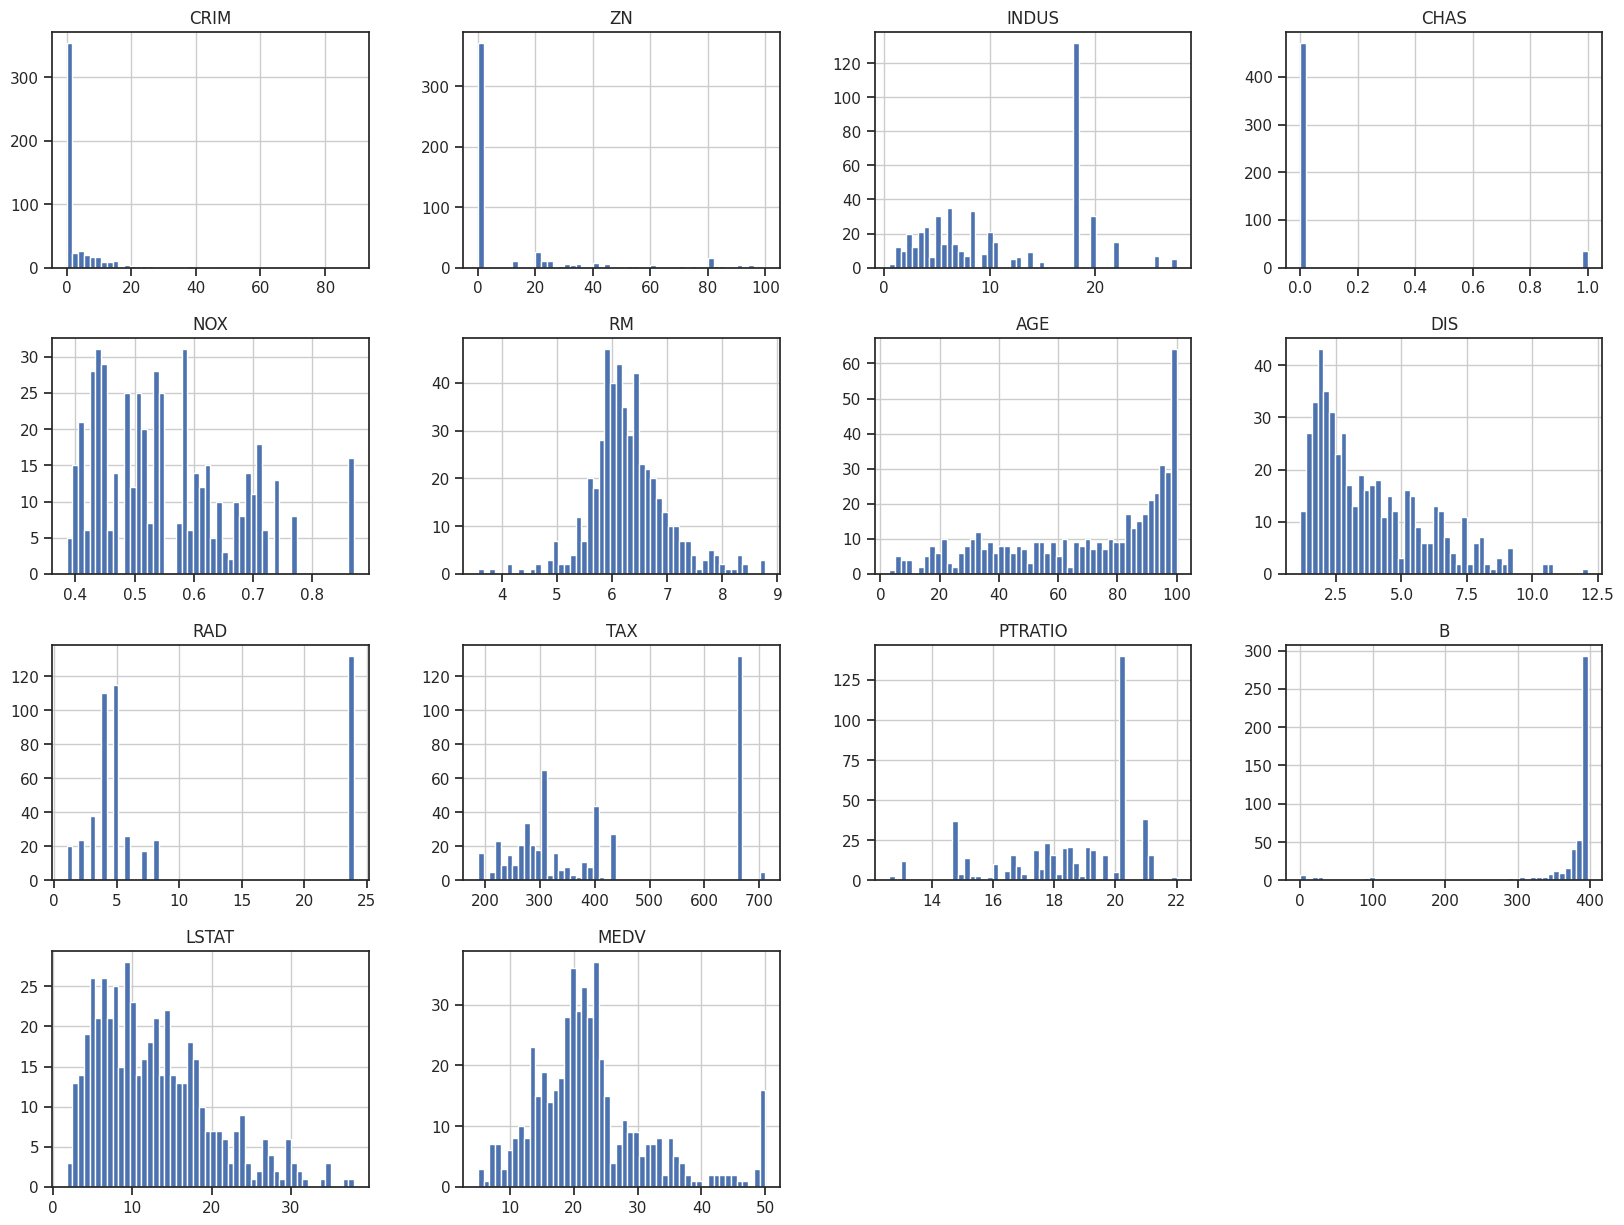

In [273]:
%matplotlib inline
import matplotlib.pyplot as plt

#Muestra los histogramas de los elementos
data.hist(bins=50,figsize=(20,15))
plt.show()

Column AGE outliers = 13.04%
Column AGE outliers = 13.44%
Column AGE outliers = 0.00%
Column AGE outliers = 100.00%
Column AGE outliers = 0.00%
Column AGE outliers = 5.93%
Column AGE outliers = 0.00%
Column AGE outliers = 0.99%
Column AGE outliers = 0.00%
Column AGE outliers = 0.00%
Column AGE outliers = 2.96%
Column AGE outliers = 15.22%
Column AGE outliers = 1.38%
Column AGE outliers = 7.91%


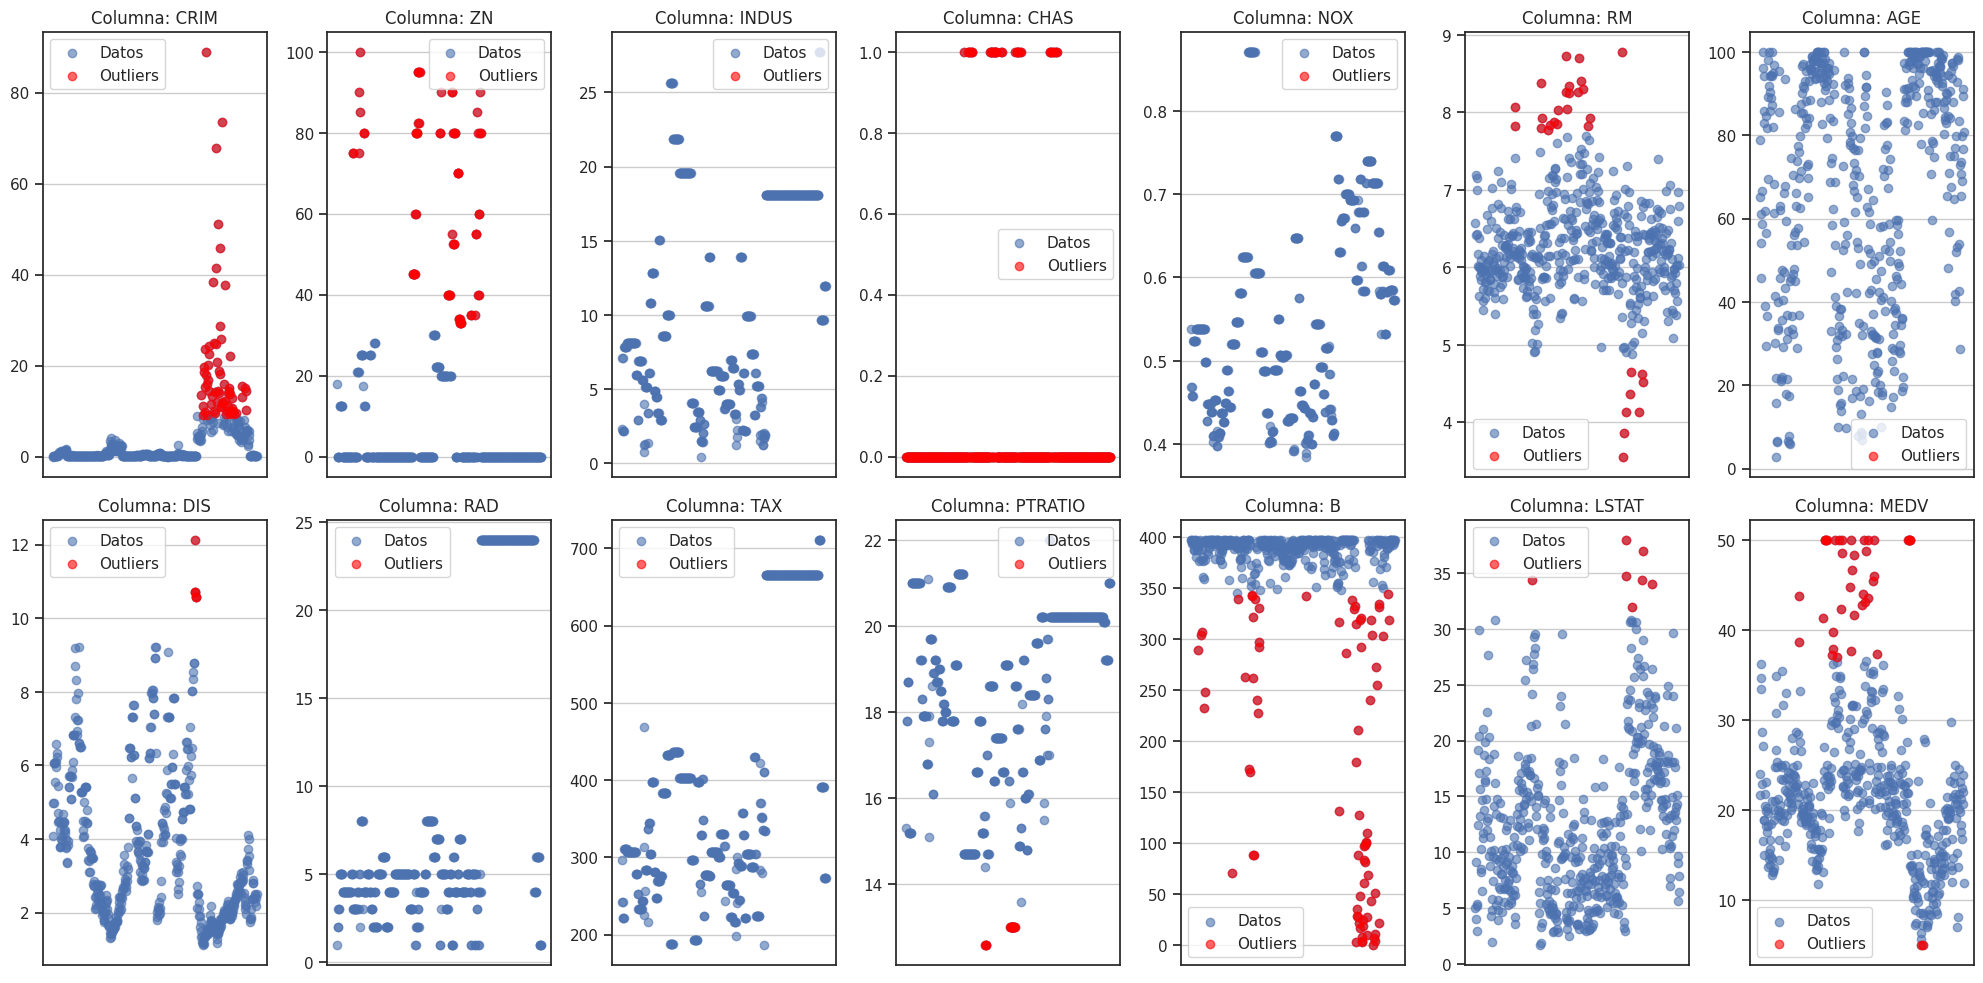

In [274]:
# Crear una figura con una gráfica de dispersión para cada columna con sus valores atípicos
fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))

# "Aplanar" la matriz de subplots para que sea más fácil iterar sobre ellos
axs = axs.flatten()

# Crear gráficas de dispersión para cada columna con sus valores atípicos
for i, (col, v) in enumerate(data.items()):
    # Calcular el primer cuartil (Q1)
    q1 = v.quantile(0.25)
    
    # Calcular el tercer cuartil (Q3)
    q3 = v.quantile(0.75)
    
    # Calcular el rango intercuartílico (IQR)
    irq = q3 - q1
    
    # Filtrar los valores atípicos (outliers)
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]

    # Calcular el porcentaje de valores atípicos respecto al total de filas en el DataFrame
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    
    # Imprimir el porcentaje de valores atípicos para la columna actual
    print("Column %s outliers = %.2f%%" % (k, perc))
    
    # Crear el gráfico de dispersión
    axs[i].scatter(range(len(v)), v, label='Datos', alpha=0.6)
    axs[i].scatter(v_col.index, v_col, color='red', label='Outliers', alpha=0.6)
    axs[i].set_xticks([])  # Ocultar los ticks en el eje x
    axs[i].set_title(f'Columna: {col}')
    axs[i].legend()
    axs[i].grid(True)

# Ajustar el diseño de los subplots para evitar superposiciones
plt.tight_layout()
plt.show()

# Verificar espacios vacios

In [275]:
# Lista de columnas para verificar
columnas_verificar = data.columns

# Verificar espacios vacíos en cada columna
for col in columnas_verificar:
    espacios_vacios = data[col].isnull().sum()
    print(f"Columna '{col}': {espacios_vacios} espacios vacíos")

Columna 'CRIM': 0 espacios vacíos
Columna 'ZN': 0 espacios vacíos
Columna 'INDUS': 0 espacios vacíos
Columna 'CHAS': 0 espacios vacíos
Columna 'NOX': 0 espacios vacíos
Columna 'RM': 0 espacios vacíos
Columna 'AGE': 0 espacios vacíos
Columna 'DIS': 0 espacios vacíos
Columna 'RAD': 0 espacios vacíos
Columna 'TAX': 0 espacios vacíos
Columna 'PTRATIO': 0 espacios vacíos
Columna 'B': 0 espacios vacíos
Columna 'LSTAT': 0 espacios vacíos
Columna 'MEDV': 0 espacios vacíos


In [276]:
# Eliminar filas con valores vacíos
data_sin_vacios = data.dropna()

# Verificar el tamaño del DataFrame después de eliminar los valores vacíos
print("Tamaño del DataFrame después de eliminar valores vacíos:", data_sin_vacios.shape)

Tamaño del DataFrame después de eliminar valores vacíos: (506, 14)


# Limpieza de anomalias

In [277]:
# Dividimos los datos en características (X) y la variable objetivo (y)
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Aplicamos la transformación logarítmica a los datos en el conjunto de características (X)
X_log = np.log1p(X)

# Aplicamos la transformación logarítmica a la variable objetivo (y)
y_log = np.log1p(y)

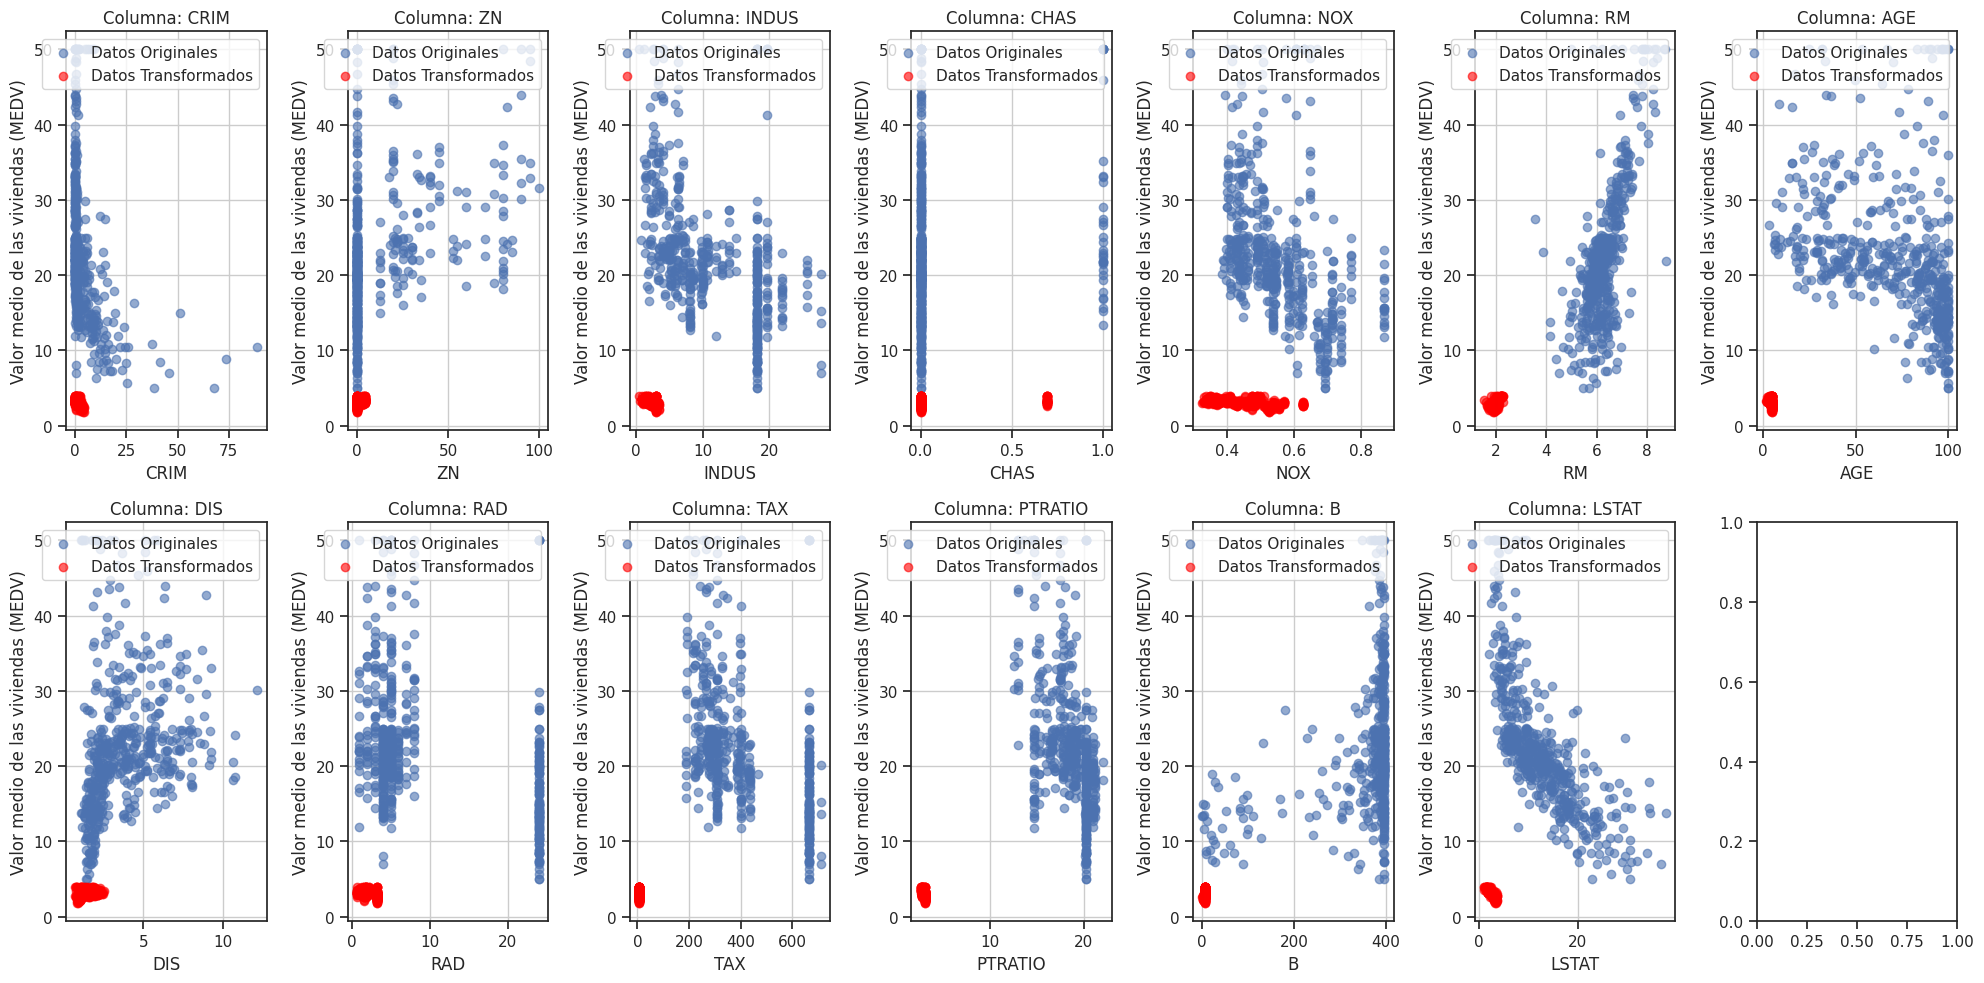

In [278]:
# Crear una figura con una gráfica de dispersión para cada columna
fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))

# "Aplanar" la matriz de subplots para que sea más fácil iterar sobre ellos
axs = axs.flatten()

# Crear gráficas de dispersión para cada columna con sus valores originales y transformados
for i, (col, v) in enumerate(X.items()):
    axs[i].scatter(v, y, label='Datos Originales', alpha=0.6)
    axs[i].scatter(X_log[col], y_log, color='red', label='Datos Transformados', alpha=0.6)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Valor medio de las viviendas (MEDV)')
    axs[i].set_title(f'Columna: {col}')
    axs[i].legend()
    axs[i].grid(True)

# Ajustar el diseño de los subplots para evitar superposiciones
plt.tight_layout()
plt.show()


# visualizar la dirección general de la relación entre las variables

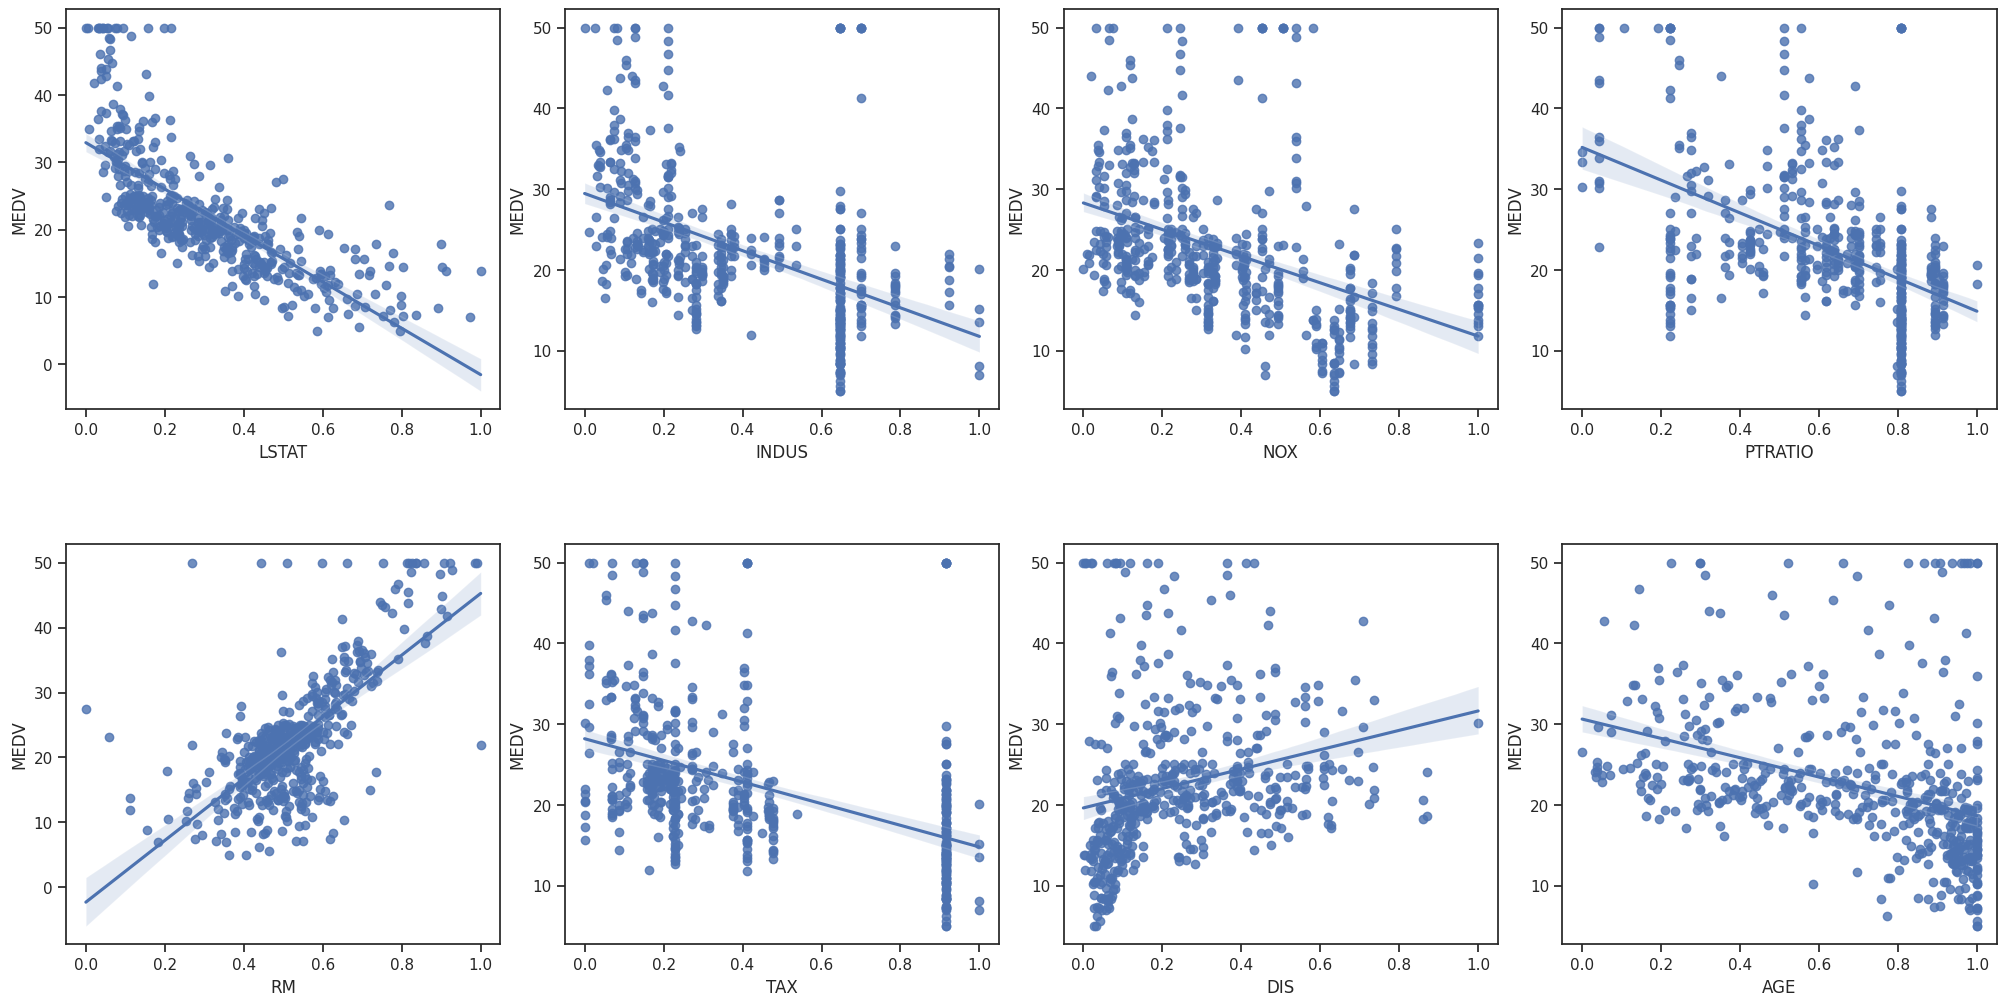

In [279]:
# Importar el módulo de preprocesamiento de scikit-learn, que se utilizará para escalar características.
from sklearn import preprocessing

# Crear un objeto MinMaxScaler, que se utilizará para escalar los datos entre 0 y 1.
min_max_scaler = preprocessing.MinMaxScaler()

# Seleccionar las columnas del DataFrame data para el conjunto de características (x).
x = data.loc[:, column_sels]

# Seleccionar la columna 'MEDV' del DataFrame data como la variable objetivo (y).
y = data['MEDV']

# Escalar los datos del conjunto de características utilizando el MinMaxScaler.
# Esto asegura que todas las características estén en el mismo rango [0, 1].
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

# Crear una figura con 2 filas y 4 columnas de subplots, con un tamaño de 20x10 pulgadas.
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))

# Inicializar un índice para rastrear la posición del subplot actual.
index = 0

# "Aplanar" la matriz de subplots para que sea más fácil iterar sobre ellos.
axs = axs.flatten()

# Iterar a través de las columnas seleccionadas (column_sels).
for i, k in enumerate(column_sels):
    # Trazar un gráfico de regresión (regplot) entre la variable objetivo (y) y cada columna escalada (x[k]).
    sns.regplot(y=y, x=x[k], ax=axs[i])
    
    # Incrementar el índice para pasar al siguiente subplot.
    index += 1

# Ajustar el diseño de los subplots para evitar superposiciones.
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Seleccion de caracteristicas

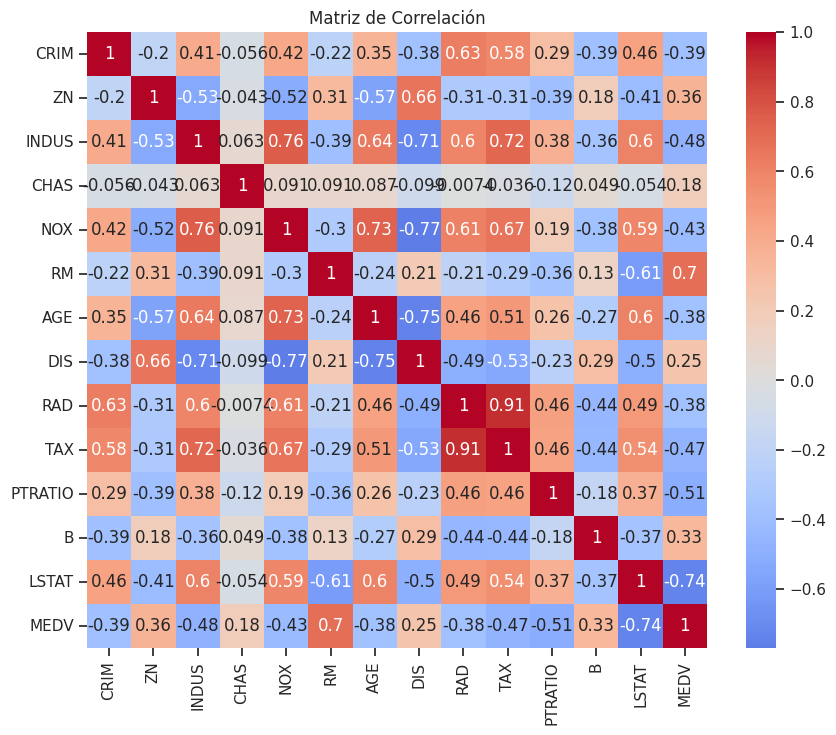

Características altamente correlacionadas con la variable objetivo:
   MEDV  LSTAT     RM  PTRATIO
0  24.0   4.98  6.575     15.3
1  21.6   9.14  6.421     17.8
2  34.7   4.03  7.185     17.8
3  33.4   2.94  6.998     18.7
4  36.2   5.33  7.147     18.7


In [280]:
# Nombre de la variable objetivo
target_column = 'MEDV'

# Calculamos la matriz de correlación
correlation_matrix = data.corr()

# Correlaciones con la variable objetivo
target_correlation = correlation_matrix[target_column]
sorted_correlations = target_correlation.abs().sort_values(ascending=False)

# Umbral para correlaciones significativas
threshold = 0.5
highly_correlated_features = sorted_correlations[sorted_correlations > threshold].index

# Crear un nuevo DataFrame solo con las características altamente correlacionadas con la variable objetivo
selected_features = data[highly_correlated_features]

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()

# Mostrar las características altamente correlacionadas con la variable objetivo
print("Características altamente correlacionadas con la variable objetivo:")
print(selected_features.head())

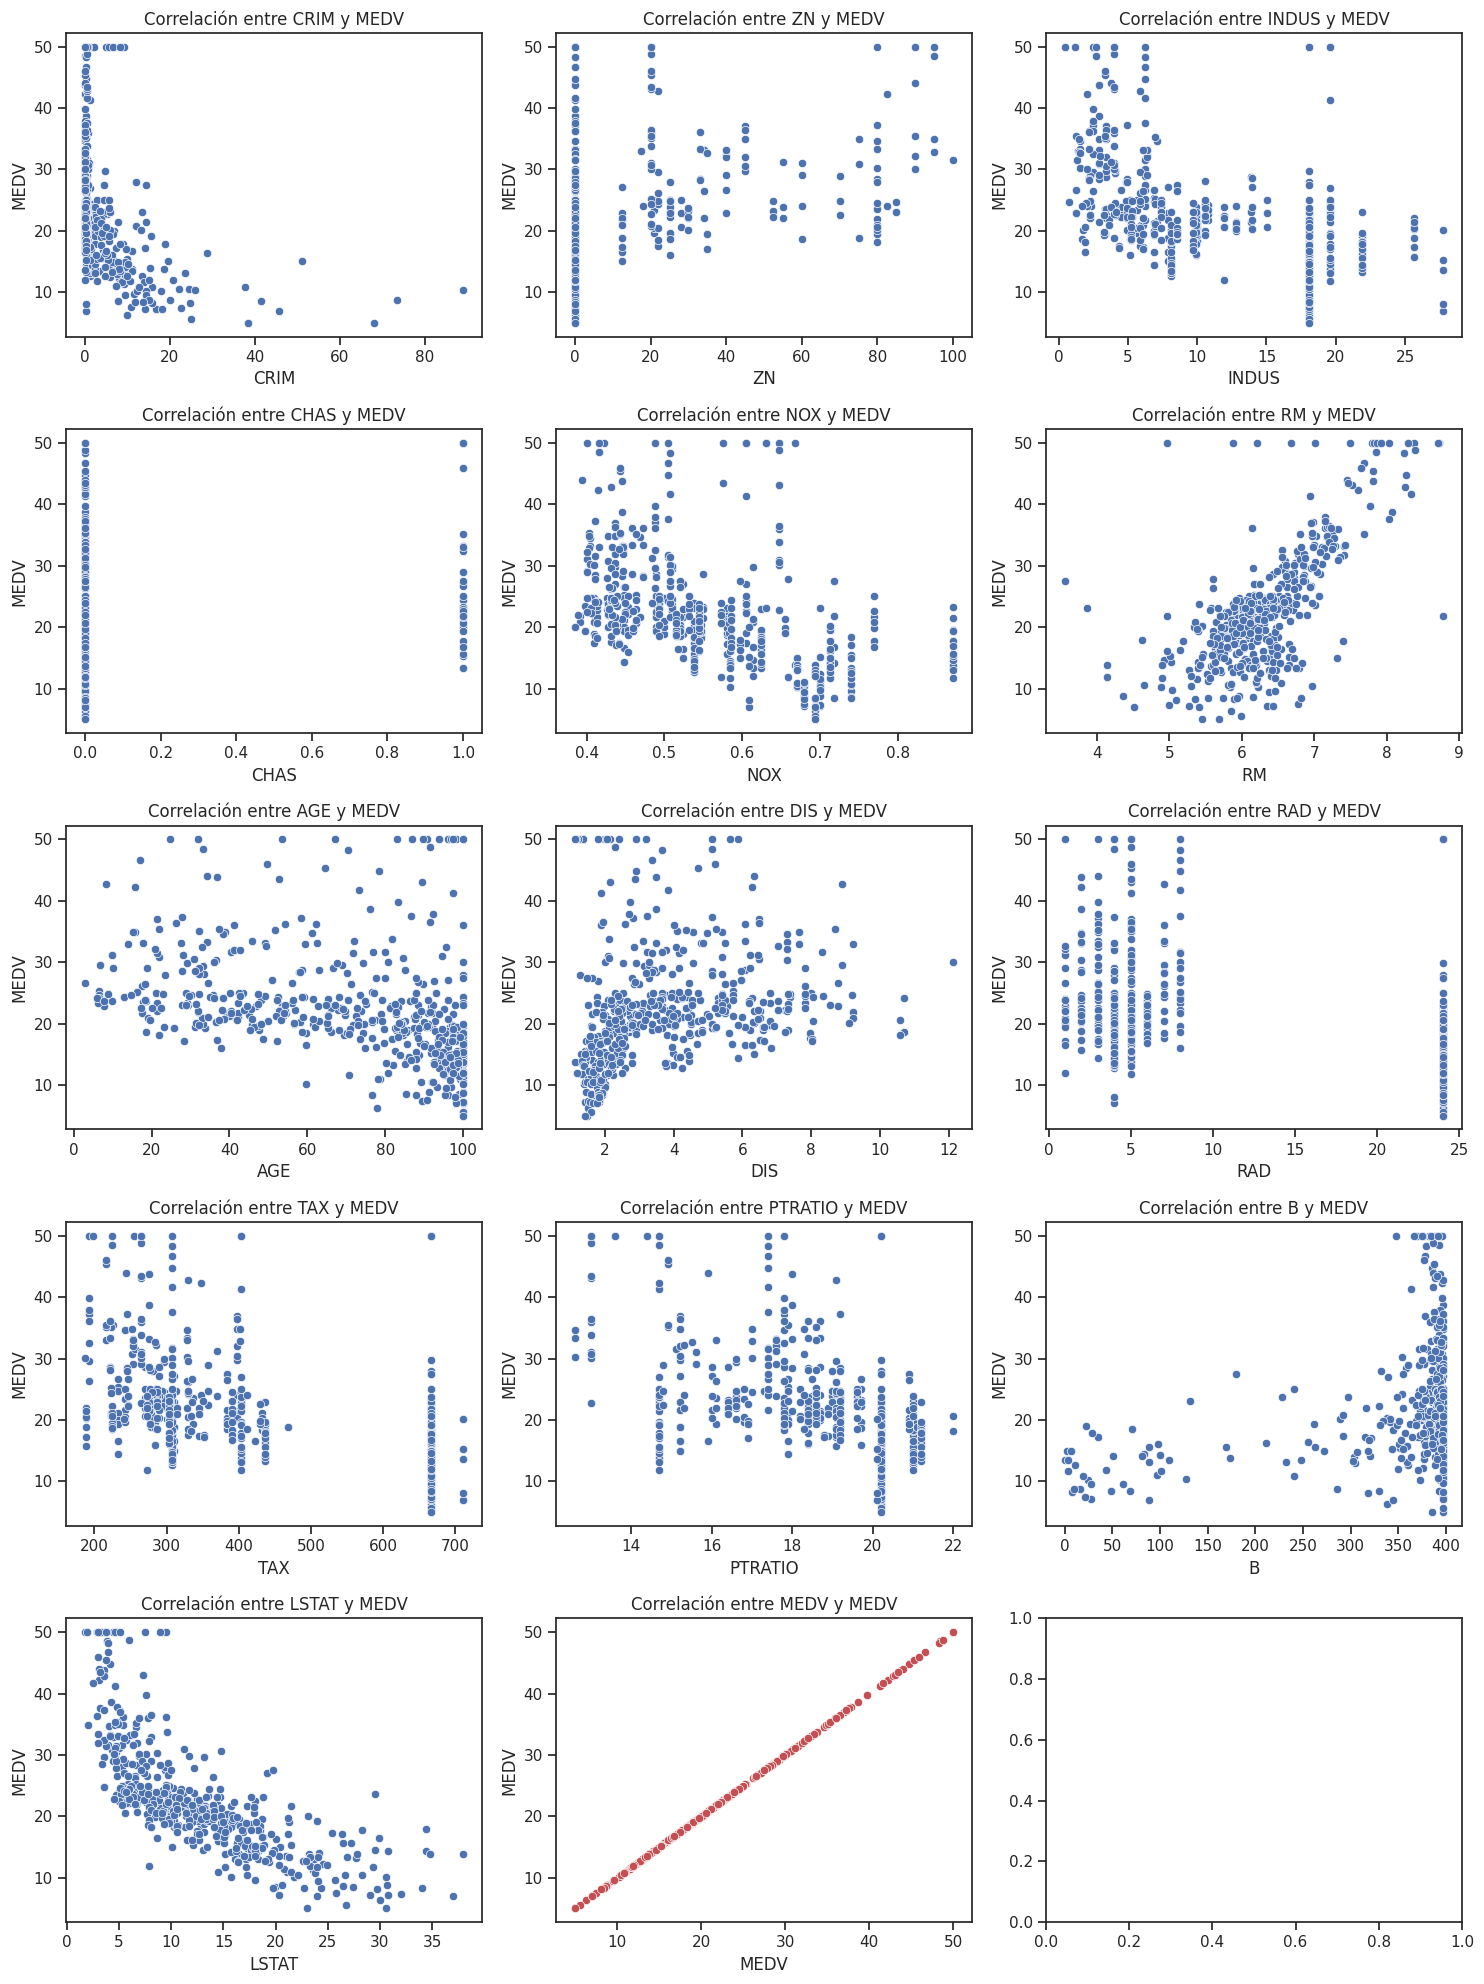

In [281]:
# Crear una figura con subplots para visualizar las gráficas de dispersión
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

# Aplanar la matriz de subplots para facilitar la iteración
axs = axs.flatten()

# Crear gráficas de dispersión para cada característica con la variable objetivo
for i, (feature, v) in enumerate(data.items()):
    sns.scatterplot(x=feature, y='MEDV', data=data, ax=axs[i], color='b' if feature != 'MEDV' else 'r')
    axs[i].set_title(f'Correlación entre {feature} y MEDV')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('MEDV')
    
# Ajustar el diseño de los subplots
plt.tight_layout()
plt.show()

# Separar entrenamiento y test

In [282]:
def split_train_test(data, target_column, test_size=0.2, random_state=None):
    """
    Divide un DataFrame en conjuntos de entrenamiento y prueba.

    Parámetros:
        data (pd.DataFrame): El DataFrame a dividir.
        target_column (str): El nombre de la columna objetivo (variable dependiente).
        test_size (float): La proporción del conjunto de prueba (por defecto es 0.2).
        random_state (int): Semilla aleatoria para reproducibilidad (por defecto es None).

    Retorna:
        X_train (pd.DataFrame): Las características de entrenamiento.
        X_test (pd.DataFrame): Las características de prueba.
        y_train (pd.Series): La variable objetivo de entrenamiento.
        y_test (pd.Series): La variable objetivo de prueba.
    """
    # Dividir los datos en conjuntos de entrenamiento y prueba
    # Dividimos los datos transformados en conjuntos de entrenamiento (80%) y prueba (20%)
    X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

    # Mostrar la cantidad de datos en los conjuntos de entrenamiento y prueba
    print(f"Número de datos para entrenamiento: {X_train.shape[0]}")
    print(f"Número de datos para prueba: {X_test.shape[0]}")

    return X_train, X_test, y_train, y_test



In [283]:
# Dividir el DataFrame 'data' en conjuntos de entrenamiento y prueba.
# 'X_train', 'X_test' contendrán las características (columnas independientes) para entrenamiento y prueba respectivamente.
# 'y_train', 'y_test' contendrán la variable objetivo (columna dependiente) para entrenamiento y prueba respectivamente.
# Se utiliza la función 'split_train_test' que toma el DataFrame 'data', especifica que la columna objetivo es 'MEDV',
# divide los datos en un 80% para entrenamiento y 20% para prueba utilizando el valor de 'test_size=0.2', y establece una
# semilla aleatoria de 42 para garantizar que la división sea reproducible mediante 'random_state=42'.
X_train, X_test, y_train, y_test = split_train_test(data, target_column='MEDV', test_size=0.2, random_state=42)

Número de datos para entrenamiento: 404
Número de datos para prueba: 102


# Creacion y entrenamiento de modelo

# Regresion Lineal

In [284]:
# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred_lr = model.predict(X_test)

# Comparar las predicciones con las etiquetas reales en y_test
mse = mean_squared_error(y_test, y_pred_lr)

# Imprimir los valores reales y las predicciones para la variable objetivo en los datos de prueba
print(f"Error cuadrático medio en los datos de prueba: {mse}")
print("Valores reales vs Predicciones:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Valor Real: {actual:.2f} | Predicción: {predicted:.2f}")

Error cuadrático medio en los datos de prueba: 0.03281099158137923
Valores reales vs Predicciones:
Valor Real: 3.20 | Predicción: 3.39
Valor Real: 3.51 | Predicción: 3.55
Valor Real: 2.68 | Predicción: 2.76
Valor Real: 3.17 | Predicción: 3.13
Valor Real: 2.84 | Predicción: 2.85
Valor Real: 3.04 | Predicción: 3.05
Valor Real: 2.93 | Predicción: 2.92
Valor Real: 2.71 | Predicción: 2.77
Valor Real: 3.03 | Predicción: 3.09
Valor Real: 2.88 | Predicción: 2.98
Valor Real: 3.11 | Predicción: 3.10
Valor Real: 2.99 | Predicción: 3.15
Valor Real: 2.08 | Predicción: 1.87
Valor Real: 3.10 | Predicción: 3.01
Valor Real: 2.97 | Predicción: 2.95
Valor Real: 3.43 | Predicción: 3.17
Valor Real: 2.99 | Predicción: 2.96
Valor Real: 2.42 | Predicción: 2.34
Valor Real: 3.93 | Predicción: 4.15
Valor Real: 2.71 | Predicción: 2.68
Valor Real: 3.27 | Predicción: 3.32
Valor Real: 3.40 | Predicción: 3.34
Valor Real: 2.62 | Predicción: 2.68
Valor Real: 3.15 | Predicción: 3.04
Valor Real: 2.72 | Predicción: 2.78
V

# Regresion Polinomial

In [285]:
# Grado del polinomio
degree = 2

# Mdelo de regresión polinómica con el grado especificado
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Realiza la validación cruzada con 5 folds
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convierte las puntuaciones de error en valores positivos
mse_scores = -cross_val_scores

# Calcula el promedio de los errores cuadráticos medios
mean_mse = np.mean(mse_scores)

In [286]:
# Entrenar el modelo de regresión polinómica en todos los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_poly = model.predict(X_test)

# Imprimir los valores reales y las predicciones
print(f"Error cuadrático medio promedio: {mean_mse}")
print("Valores reales\tPredicciones")
for real, pred in zip(y_test, y_pred_poly):
    print(f"{real:.2f}\t\t{pred:.2f}")

Error cuadrático medio promedio: 0.04107238537066041
Valores reales	Predicciones
3.20		3.39
3.51		3.55
2.68		2.76
3.17		3.13
2.84		2.85
3.04		3.05
2.93		2.92
2.71		2.77
3.03		3.09
2.88		2.98
3.11		3.10
2.99		3.15
2.08		1.87
3.10		3.01
2.97		2.95
3.43		3.17
2.99		2.96
2.42		2.34
3.93		4.15
2.71		2.68
3.27		3.32
3.40		3.34
2.62		2.68
3.15		3.04
2.72		2.78
2.69		2.89
3.06		3.08
2.77		2.72
3.12		2.95
2.96		2.97
3.18		3.21
3.21		3.20
2.77		2.92
3.08		3.15
3.00		2.80
3.02		2.95
3.58		3.49
3.02		3.07
3.23		3.08
3.19		3.23
3.03		2.85
3.37		3.47
3.93		3.94
2.91		2.95
3.16		3.20
2.78		2.78
2.65		2.72
3.23		3.28
3.04		2.94
3.22		3.03
2.99		3.16
3.59		3.60
2.79		2.80
3.31		3.26
3.80		3.87
3.10		3.20
2.97		2.80
3.38		3.51
3.21		3.22
2.97		2.80
3.26		3.18
3.59		3.49
3.48		3.39
3.05		2.85
3.22		3.39
3.04		2.99
2.65		2.73
3.25		3.26
3.46		3.37
2.62		2.79
3.04		3.11
3.21		3.41
2.47		2.38
3.07		3.14
3.08		3.14
1.79		1.98
3.05		3.07
3.90		3.86
2.48		2.56
2.08		2.53
3.09		3.11
2.90		2.81
3.09		2.97
2.37		

# Random forest

In [287]:
# Crear un modelo de Random Forest
rf_model = RandomForestRegressor()

# Entrenar el modelo en los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular el error cuadrático medio en los datos de prueba
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Imprimir el error cuadrático medio
print(f"Error cuadrático medio en los datos de prueba: {mse_rf:.8f}")

# Imprimir los valores reales y las predicciones
print("Valores reales\tPredicciones (Random Forest)")
for real, pred in zip(y_test, y_pred_rf):
    print(f"{real:.2f}\t\t{pred:.2f}")

Error cuadrático medio en los datos de prueba: 0.02310567
Valores reales	Predicciones (Random Forest)
3.20		3.16
3.51		3.46
2.68		2.86
3.17		3.17
2.84		2.87
3.04		3.10
2.93		3.01
2.71		2.78
3.03		3.09
2.88		3.09
3.11		3.05
2.99		3.04
2.08		2.21
3.10		3.10
2.97		3.02
3.43		3.31
2.99		3.03
2.42		2.22
3.93		3.85
2.71		2.75
3.27		3.22
3.40		3.22
2.62		2.73
3.15		3.20
2.72		2.72
2.69		2.73
3.06		3.10
2.77		2.68
3.12		3.02
2.96		3.10
3.18		3.04
3.21		3.19
2.77		3.54
3.08		3.07
3.00		2.71
3.02		2.81
3.58		3.55
3.02		3.01
3.23		3.06
3.19		3.24
3.03		2.99
3.37		3.41
3.93		3.85
2.91		2.99
3.16		3.15
2.78		2.67
2.65		2.77
3.23		3.23
3.04		2.94
3.22		3.32
2.99		3.10
3.59		3.55
2.79		2.85
3.31		3.30
3.80		3.85
3.10		3.12
2.97		2.78
3.38		3.50
3.21		3.14
2.97		3.10
3.26		3.30
3.59		3.55
3.48		3.38
3.05		2.98
3.22		3.29
3.04		2.89
2.65		2.69
3.25		3.18
3.46		3.36
2.62		2.78
3.04		3.09
3.21		3.41
2.47		2.44
3.07		3.08
3.08		3.12
1.79		2.07
3.05		3.05
3.90		3.85
2.48		2.49
2.08		2.55
3.09		3.10
2.90		2

# Funciones Costo

In [288]:
# Calcular el error cuadrático medio en los datos de prueba para la regresión lineal
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Error cuadrático medio para Regresión Lineal: {mse_lr:.8f}")

Error cuadrático medio para Regresión Lineal: 0.03281099


In [289]:
# Calcular el error cuadrático medio en los datos de prueba para la regresión polinómica
mse_poly = np.mean(mse_scores)
print(f"Error cuadrático medio para Regresión Polinómica: {mse_poly:.8f}")

Error cuadrático medio para Regresión Polinómica: 0.04107239


In [290]:
# Calcular el error cuadrático medio en los datos de prueba para Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Error cuadrático medio para Random Forest: {mse_rf:.8f}")

Error cuadrático medio para Random Forest: 0.02310567


# Entrenamiento

In [291]:
l_regression = linear_model.LinearRegression()
l_regression.fit(X_train, y_train)

LinearRegression()

In [292]:
poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(X_train)

poly_regression = linear_model.Ridge()
poly_regression.fit(x_poly, y_train)

Ridge()

In [293]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [294]:
# Predicciones de regresión lineal
y_pred_lr_train = l_regression.predict(X_train)

# Predicciones de regresión polinómica
x_poly_train = poly_features.transform(X_train)
y_pred_poly_train = poly_regression.predict(x_poly_train)

# Predicciones de Random Forest
y_pred_rf_train = random_forest.predict(X_train)

In [295]:
# Predicciones de regresión lineal
y_pred_lr_train = l_regression.predict(X_train)
print("Predicciones de Regresión Lineal (entrenamiento):")
print(y_pred_lr_train)

# Predicciones de regresión polinómica
x_poly_train = poly_features.transform(X_train)
y_pred_poly_train = poly_regression.predict(x_poly_train)
print("Predicciones de Regresión Polinómica (entrenamiento):")
print(y_pred_poly_train)

# Predicciones de Random Forest
y_pred_rf_train = random_forest.predict(X_train)
print("Predicciones de Random Forest (entrenamiento):")
print(y_pred_rf_train)


Predicciones de Regresión Lineal (entrenamiento):
[2.54045908 3.03177883 3.06525825 2.48478294 2.94714378 3.33949275
 3.16167566 3.21072182 2.34123462 2.77838964 3.2259884  3.33526898
 3.53037025 2.68091611 3.51082348 2.73870495 3.10868332 3.39023728
 2.95539479 3.29566623 2.28553049 3.22314421 3.29758772 3.19669074
 3.22022292 3.63623498 2.90179128 3.80584183 2.76565567 3.26185878
 2.85673864 3.04229595 2.63300703 2.94796843 3.19110798 3.59249732
 3.41195367 2.79155154 2.83818413 3.45663041 3.1394981  2.86703535
 2.38243062 3.20950768 3.05361296 2.71014621 2.70466396 3.73760801
 2.77398261 2.75361679 3.37175497 3.17599728 3.10473493 3.08769636
 2.66300742 3.09602964 3.59121415 2.42595129 3.16645652 2.98134379
 3.06106191 3.28875382 3.32740758 2.94619196 3.70962434 2.77848546
 2.81088385 2.94314077 2.95418039 3.13318512 3.21561647 3.60037939
 2.97089664 3.07206584 3.27092297 3.55667812 3.6830882  3.29963182
 2.60543819 2.48493808 2.65521804 2.81400909 3.63028037 3.48129078
 2.51769781 

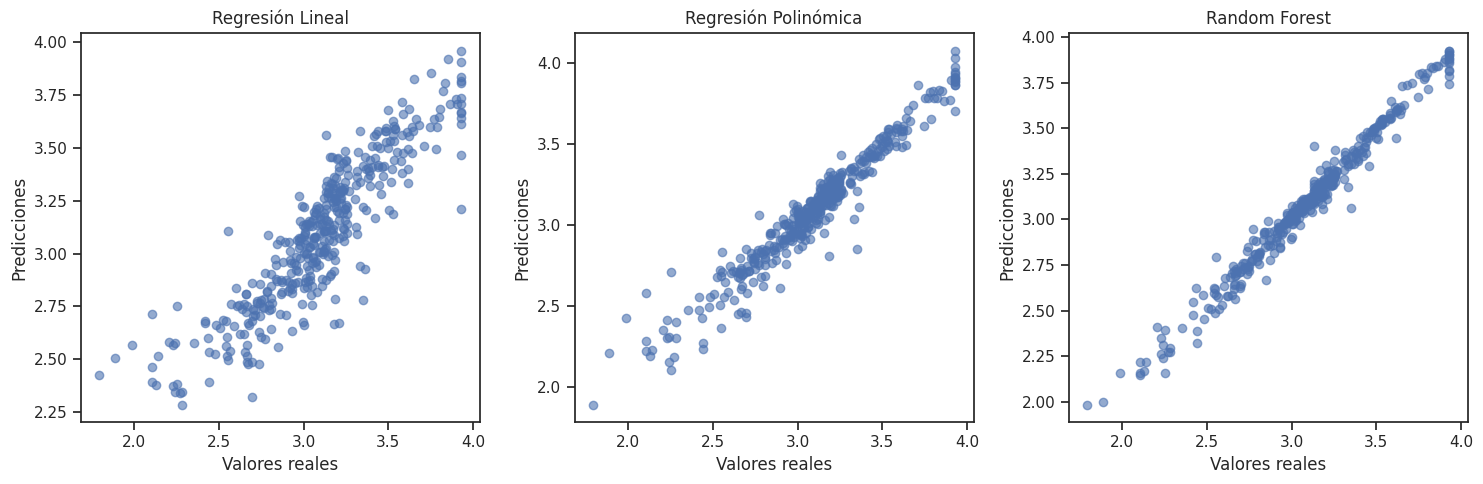

In [298]:
# Crear una figura con subplots para las tres gráficas de dispersión
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Gráfica de dispersión para Regresión Lineal
axs[0].scatter(y_train, y_pred_lr_train, alpha=0.6)
axs[0].set_xlabel('Valores reales')
axs[0].set_ylabel('Predicciones')
axs[0].set_title('Regresión Lineal')

# Gráfica de dispersión para Regresión Polinómica
axs[1].scatter(y_train, y_pred_poly_train, alpha=0.6)
axs[1].set_xlabel('Valores reales')
axs[1].set_ylabel('Predicciones')
axs[1].set_title('Regresión Polinómica')

# Gráfica de dispersión para Random Forest
axs[2].scatter(y_train, y_pred_rf_train, alpha=0.6)
axs[2].set_xlabel('Valores reales')
axs[2].set_ylabel('Predicciones')
axs[2].set_title('Random Forest')

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()
